In [202]:
%load_ext autoreload
%autoreload 2
import os
import glob
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
#pd.options.display.max_rows = 100
import settings as s
import images as im
import seaborn as sns 
import indicoio
import sys
import utils
sys.path.append("../Tools/python-client")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get HostIDs relevant to guests

### Get Reviews

In [67]:
reviews = pd.read_csv(os.path.join(s.DATA_DIR, 'filtered/reviews.csv'), index_col=0)

In [79]:
reviews.head()

,idReview,id,date,reviewer_id,listing_id,recipient_id,comments
0,1,198,2008-10-13,2603,2515,2758,Stephanie was a wonderful host! Her apartment ...
1,2,859,2009-03-08,8455,2515,2758,Such a wonderful place and very close to the m...
2,3,1083,2009-03-25,9759,2515,2758,I just got back from a trip to NYC during whic...
3,4,1107,2009-03-27,9193,2515,2758,Stephanie's offered all the most important thi...
4,5,2175,2009-05-09,7048,2515,2758,"Stephanie was really nice, ftiendly and helpfu..."


### Get Guests

In [68]:
guests = pd.read_csv(os.path.join(s.DATA_DIR, 'filtered/guests.csv'), index_col=0)

In [69]:
guests.head(2)

,idGuest,id,name,city,membershipMonth,membershipYear,superhost,verified,description,linkedAccountVerified,schoolInfo,jobInfo,languages,reviewNumber,guideNumber,whishListNumber
0,1,66056138,Blake,"Lake Forest, Illinois, United States",April,2016,false,true,Hi! I’m Blake. I’m a really easy going guy who...,"[Official Identity Document, Selfie, Personal ...",null,null,null,20.0,0.0,0.0
26,27,110890166,Caitlin,"Thornbury, Australia",January,2017,false,true,NaN,"[Official Identity Document, Email Address, Ph...",Australian,null,null,11.0,0.0,3.0


In [70]:
guest_ids = set(guests['id'])

In [71]:
len(guests)

20487

## Gets listings

In [72]:
listings = pd.read_csv(os.path.join(s.DATA_DIR, 'filtered/listings.csv'), index_col=0)

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Get and Filter Hosts

In [76]:
hosts = pd.read_csv(os.path.join(s.DATA_DIR, 'filtered/hosts.csv'))

In [77]:
len(hosts)

18633

In [78]:
hosts.head(2)

,id,name,since,location,about,response_time,response_rate,is_superhost,picture_url,neighbourhood,listings_count,total_listings_count,verifications,has_profile_pic,identity_verified,calculated_listings_count
0,2758,Mizi,2008-09-06,"New York, New York, United States",loves to host and welcome travelers from arou...,within a few hours,100%,f,https://a0.muscache.com/im/users/2758/profile_...,Harlem,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,3
1,2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,88%,f,https://a0.muscache.com/im/users/2845/profile_...,Midtown,5.0,5.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,2


# Filtering Assessment

## Multiple Listings

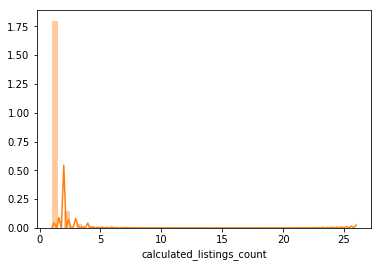

In [80]:
sns.distplot(hosts['calculated_listings_count'])
plt.show()

In [1]:
hosts['calculated_listings_count'].value_counts()[0]

NameError: name 'hosts' is not defined

In [92]:
print ('Percentage of hosts in Manhattan that only have 1 listing: %.2f'% (16757/18633*100), "%")

Percentage of hosts in Manhattan that only have 1 listing: 89.93 %


#### Reduce Hosts

In [107]:
single_listing_hosts = hosts[hosts['calculated_listings_count'] == 1]

In [108]:
len(single_listing_hosts)

16757

In [110]:
single_listing_hosts.head(1)

,id,name,since,location,about,response_time,response_rate,is_superhost,picture_url,neighbourhood,listings_count,total_listings_count,verifications,has_profile_pic,identity_verified,calculated_listings_count
2,4632,Elisabeth,2008-11-25,"New York, New York, United States",Make Up Artist National/ (Website hidden by Ai...,NaN,NaN,f,https://a0.muscache.com/im/users/4632/profile_...,Harlem,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,1


#### Reduce Listings

In [113]:
single_listing_listings = listings[listings['host_id'].isin(single_listing_hosts['id'].unique())]

In [114]:
len(single_listing_listings)/21473*100

78.03753550970987

#### Reduce Reviews

In [115]:
single_listing_reviews = reviews[reviews['recipient_id'].isin(single_listing_hosts['id'].unique())]

In [117]:
len(single_listing_reviews)/433320*100

69.91876673128404

In [118]:
len(single_listing_reviews)

302972

#### Reduce Guests

In [140]:
single_listing_guest_ids = single_listing_reviews['reviewer_id'].unique()

In [364]:
len(single_listing_guest_ids)

282745

In [142]:
len(single_listing_guest_ids)/397693*100

71.09629789812745

In [143]:
single_listing_guests = guests[guests['id'].isin(single_listing_guest_ids)]

In [144]:
len(single_listing_guests)

13252

## Multiple Reviews

In [151]:
hosts_w_reviews_ids = single_listing_reviews['recipient_id'].unique()

In [152]:
total_hosts_ids = single_listing_hosts['id'].unique()

In [363]:
len(hosts_w_reviews_ids)

13058

In [155]:
len(set(total_hosts_ids) - set(hosts_w_reviews_ids))

3699

In [183]:
review_count_dist = single_listing_reviews[['recipient_id','reviewer_id']].groupby(['recipient_id']).agg(['count'])

In [184]:
review_count_dist.columns = review_count_dist.columns.droplevel(0)

In [187]:
len(review_count_dist)

13058

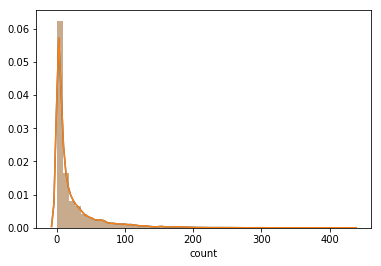

In [189]:
sns.distplot(review_count_dist['count'])
plt.show()

In [193]:
review_count_dist['count'].describe()

count    13058.000000
mean        23.202022
std         36.982636
min          1.000000
25%          3.000000
50%          8.000000
75%         27.000000
max        430.000000
Name: count, dtype: float64

## Accommodation Types

In [195]:
single_listing_listings['property_type'].value_counts()

Apartment             15480
Loft                    392
Condominium             390
Townhouse               128
Serviced apartment      116
House                   107
Other                    46
Resort                   32
Bed and breakfast        20
Guest suite              14
Boutique hotel           10
Hotel                     7
Hostel                    6
Guesthouse                3
Villa                     2
Tent                      1
Boat                      1
Bungalow                  1
Tiny house                1
Name: property_type, dtype: int64

In [201]:
listings['room_type'].value_counts()

Entire home/apt    12622
Private room        8330
Shared room          521
Name: room_type, dtype: int64

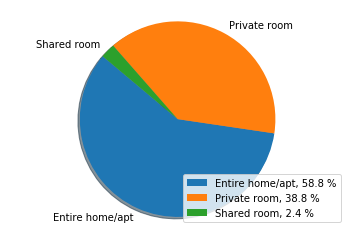

,room_type,count
0,Entire home/apt,12622
1,Private room,8330
2,Shared room,521


In [206]:
utils.plot_pie_graph(listings, 'room_type')

In [200]:
single_listing_listings['room_type'].value_counts()

Entire home/apt    10952
Private room        5522
Shared room          283
Name: room_type, dtype: int64

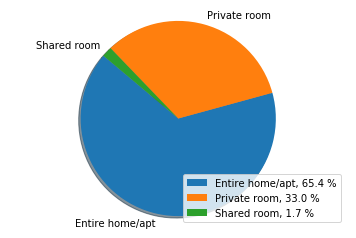

,room_type,count
0,Entire home/apt,10952
1,Private room,5522
2,Shared room,283


In [208]:
utils.plot_pie_graph(single_listing_listings, 'room_type')

# Restricting Data

In [209]:
eng_reviews = pd.read_csv(os.path.join(s.DATA_DIR, 'finalised/reviews.csv'), index_col=0)

In [211]:
len(eng_reviews)

357225

#### Reduce Reviews

In [212]:
single_listing_eng_reviews = eng_reviews[eng_reviews['recipient_id'].isin(hosts_w_reviews_ids)]

In [213]:
len(single_listing_eng_reviews)

250968

In [214]:
len(single_listing_eng_reviews)/433320*100

57.9174743838272

In [215]:
## Reduce Hosts

In [216]:
single_listing_eng_host_ids = single_listing_eng_reviews['recipient_id'].unique()

In [217]:
len(single_listing_eng_host_ids)

12313

#### Reduce Guests

In [218]:
single_listing_eng_guest_ids = single_listing_eng_reviews['reviewer_id'].unique()

In [220]:
len(single_listing_eng_guest_ids)

234068

In [221]:
len(single_listing_eng_guest_ids)/397693*100

58.85645460191655

In [222]:
single_listing_eng_guests = guests[guests['id'].isin(single_listing_eng_guest_ids)]

In [223]:
len(single_listing_eng_guests)

11407

#### Reduce Listings

In [224]:
single_listing_eng_listings = listings[listings['host_id'].isin(single_listing_eng_host_ids)]

In [225]:
len(single_listing_eng_listings)/21473*100

57.341778046849534

In [226]:
len(single_listing_eng_listings)

12313

In [266]:
single_listing_eng_listings.to_csv('../Data/finalised/listings.csv')

In [267]:
single_listing_eng_reviews.to_csv('../Data/finalised/reviews_reduced.csv')

In [268]:
pd.DataFrame({'id': list(single_listing_eng_guest_ids)}).to_csv('../Data/finalised/guestIDs.csv')

In [269]:
pd.DataFrame({'id': list(single_listing_eng_host_ids)}).to_csv('../Data/finalised/hostIDs.csv')

In [270]:
single_listing_hosts.to_csv('../Data/finalised/single_listing_hosts.csv')

## Testing Localisation

In [232]:
guest_pic_files = glob.glob(os.path.join(s.SCRAPER_DIR + '/img/', 'guest*.csv'))[::-1]

In [234]:
guests_pics = pd.concat((pd.read_csv(f,) for f in guest_pic_files))

In [237]:
guests_pics.drop_duplicates()
guests_pics.head()

,id
0,2603
1,630786
2,36560898
3,688135
4,159965193


In [308]:
len(guests_pics)

50806

In [333]:
guests_pics = guests_pics[guests_pics['id'].isin(single_listing_eng_guest_ids)]

In [334]:
len(guests_pics)

33001

# Getting the data collected 

In [238]:
host_pic_files = glob.glob(os.path.join(s.SCRAPER_DIR + '/img/', 'host*.csv'))[::-1]

In [239]:
host_pics = pd.concat((pd.read_csv(f,) for f in host_pic_files))

In [240]:
host_pics.drop_duplicates()
host_pics.head()

,id
0,5586949
1,1925126
2,2605064
3,137469964
4,5283853


In [241]:
len(host_pics)

2334

In [330]:
host_pics = host_pics[host_pics['id'].isin(single_listing_eng_host_ids)]

In [331]:
len(host_pics)

1817

In [263]:
host_pics['num_of_people'] = get_num_of_people(os.path.join(s.SCRAPER_DIR, 'img', 'hosts'), host_pics['id'])

In [336]:
host_pics.to_csv('../Data/finalised/host_ids_done.csv')

In [343]:
host_pics['num_of_people'].value_counts()

1.0    910
0.0    635
2.0    230
3.0     29
4.0      7
5.0      1
6.0      1
Name: num_of_people, dtype: int64

### ADDITION : Relevant Host Pics - check that host ids are in final host list

### Get Sample of relevant Guest pics 

In [335]:
rel_host_pic_ids = host_pics[host_pics['num_of_people'] == 1]['id']

In [339]:
len(rel_host_pic_ids)

910

In [ ]:
## All Guests that have hosts - with only 1 pic in profile

In [346]:
rel_guest_pic_ids = single_listing_eng_reviews[single_listing_eng_reviews['recipient_id'].isin(rel_host_pic_ids)]['reviewer_id'].unique()

In [347]:
len(rel_guest_pic_ids)

49314

In [ ]:
# From those guests which ones have we already collected 

In [278]:
rel_guest_pics = guests_pics[guests_pics['id'].isin(rel_guest_pic_ids)]

In [351]:
len(rel_guest_pics)

10219

In [350]:
rel_guest_pics = rel_guest_pics[rel_guest_pics['id'].isin(single_listing_eng_guest_ids)]
rel_guest_pics['num_of_people'].value_counts()

1.0     5656
0.0     2602
2.0     1477
3.0      279
4.0       52
5.0       19
6.0        5
8.0        2
33.0       1
7.0        1
Name: num_of_people, dtype: int64

In [279]:
len(rel_guest_pics)

10219

In [280]:
rel_guest_pics['num_of_people'] = get_num_of_people(os.path.join(s.SCRAPER_DIR, 'img', 'guests'), rel_guest_pics['id'])

/Users/lynraybarends/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [352]:
rel_guest_pics.head()

,id,num_of_people
6,16187408,1.0
9,16261149,0.0
15,118751283,1.0
17,24207418,2.0
23,3309641,1.0


In [353]:
rel_guest_pics.to_csv('../Data/finalised/guest_ids_done.csv')

In [354]:
one_guest_ids = rel_guest_pics[rel_guest_pics['num_of_people'] == 1]['id']

In [355]:
len(one_guest_ids)

5656

### Get 1-to-1 matches

In [298]:
fin_rev = single_listing_eng_reviews

In [307]:
len(fin_rev)

250968

In [359]:
sample_reviews = fin_rev[(fin_rev['reviewer_id'].isin(one_guest_ids)) & (fin_rev['recipient_id'].isin(rel_host_pic_ids))]
                                            ##) and (single_listing_eng_reviews['recipient_id'].isin(set(rel_host_pic_ids)))]






In [360]:
len(sample_reviews)

6061

In [356]:
potential_reviews = fin_rev[(fin_rev['reviewer_id'].isin(guests_pics['id'].unique())) & (fin_rev['recipient_id'].isin(host_pics['id'].unique()))]
                                       

In [357]:
len(potential_reviews)

22482

In [361]:
sample_reviews.to_csv('../Data/finalised/sample_reviews.csv')

# Getting IDs still needed  - Pictures 

In [368]:
guest_pic_files = glob.glob(os.path.join(s.SCRAPER_DIR + '/img/', 'guest*.csv'))[::-1]

In [369]:
guestIds_done = pd.concat((pd.read_csv(f,) for f in guest_pic_files))

In [370]:
guestIds_done.drop_duplicates()
guestIds_done.head()

,id
0,2603
1,630786
2,36560898
3,688135
4,159965193


In [372]:
len(guestIds_done)

58057

In [381]:
left_guests = set(single_listing_guest_ids) - set( [int(g) for g in guestIds_done['id']])

In [382]:
len(left_guests)

242034

In [388]:
pd.DataFrame({'id': list(left_guests)}).to_csv("LiciaGIoGuestPics.csv")

In [394]:
left_hosts = set(hosts_w_reviews_ids) - set(host_pics['id'])

In [395]:
pd.DataFrame({'id': list(left_hosts)}).to_csv("HostPics.csv")

In [397]:
pd.DataFrame({'id': single_listing_guest_ids}).to_csv("FullGuestIds.csv")